In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("survey.csv")

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.shape

(1259, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.Age.describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [9]:
df['Age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         

In [10]:
df.drop(df[df['Age'] < 0].index , inplace = True)

In [11]:
df.drop(df[df['Age'] > 100].index , inplace = True)

In [12]:
df.describe()

,Age
count,1254.000000
mean,32.019139
std,7.375005
min,5.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [13]:
df['Gender'].value_counts()

Male                                              613
male                                              205
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female (trans)                                      2
Female                                              2
Cis Male                                            2
Man                                                 2
msle                                                1
male leaning androgynous                            1
Cis Man                                             1
Trans woman                 

In [14]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

In [15]:
df['Gender'].value_counts()

Male      988
Female    247
Other      19
Name: Gender, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='count'>

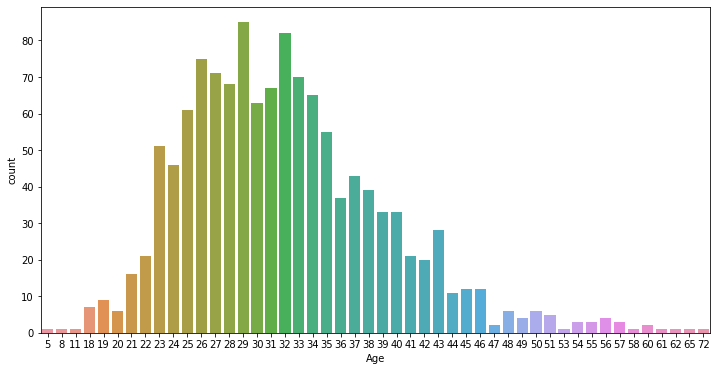

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Age' , data = df)

<AxesSubplot: xlabel='Gender', ylabel='count'>

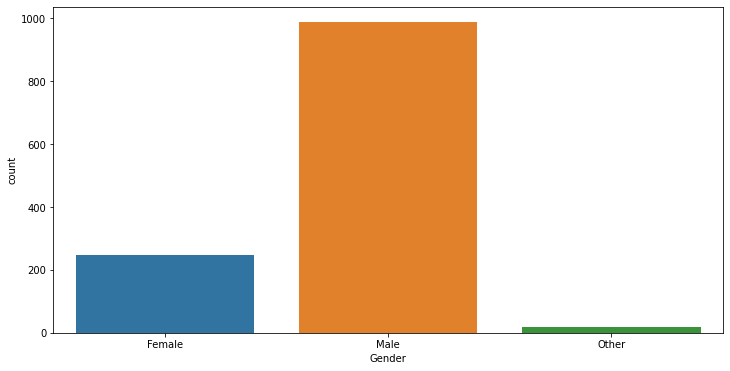

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Gender' , data = df)

In [21]:
df.groupby('Gender')['work_interfere'].value_counts()

Gender  work_interfere
Female  Sometimes         108
        Rarely             44
        Often              34
        Never              25
Male    Sometimes         345
        Never             187
        Rarely            126
        Often             104
Other   Sometimes          11
        Often               3
        Rarely              3
        Never               1
Name: work_interfere, dtype: int64

<AxesSubplot: xlabel='work_interfere', ylabel='count'>

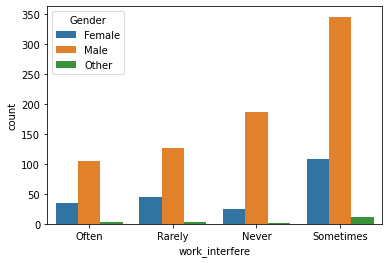

In [22]:
sns.countplot(data = df , x = 'work_interfere' , hue = 'Gender')

In [23]:
df['self_employed'].value_counts()

No     1092
Yes     144
Name: self_employed, dtype: int64

<AxesSubplot: xlabel='remote_work', ylabel='count'>

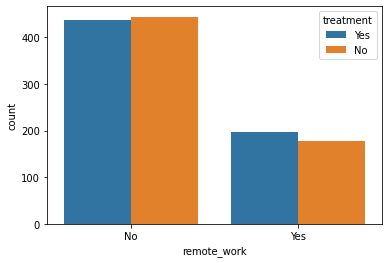

In [30]:
sns.countplot(data = df, x = 'remote_work' ,hue = 'treatment')

C:\Users\dasar\AppData\Local\Temp\ipykernel_18300\2547595384.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('treatment')['remote_work','Gender'].value_counts().plot()


<AxesSubplot: xlabel='treatment,remote_work,Gender'>

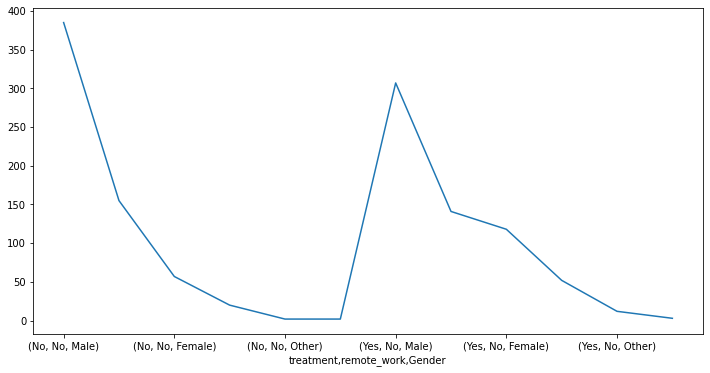

In [35]:
plt.figure(figsize=(12,6))
df.groupby('treatment')['remote_work','Gender'].value_counts().plot()